The sampling incoherence is removed when interleving the positive and negative echos. However, a 2x acceleration is introduced to each dataset, resulting in a lower snr image. 

In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from util.fft import *
from util.entropy import *
import util.simulator as simulate 
from util.coil import * 
from util.cgSolver import * 

In [2]:
data = np.load("../lib/slice1_grappa1.npy")
rawImages = ifft2c(data)
coilmaps = inati_cmap(rawImages) 
dataR = np.copy(data)
R = 2
dataR[::R] = 0
ny, nx, nc = data.shape

In [3]:
x = np.linspace(-0.5, 0.5, nx)
a = 3
b = 3
c = -1
tvecm = np.exp(1j* (a * x**4+b*x+c)) 
data = apply_epi_phase(data, tvecm)

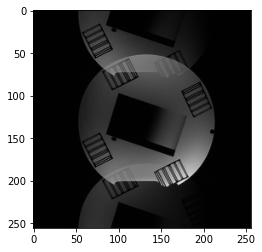

In [4]:
showrsos(ifft2c(data))

In [5]:
def epi_phasecorrection_page(data, coilmaps):
    even = np.zeros(data.shape, dtype = complex)
    odd = np.zeros(data.shape, dtype = complex)
    even[::2] = data[::2]
    odd[1::2] = data[1::2]
    even_recon = cg_sense(even, coilmaps) 
    odd_recon = cg_sense(odd, coilmaps)
    recon = even_recon + odd_recon
    return recon

In [6]:
recon = epi_phasecorrection_page(data, coilmaps)

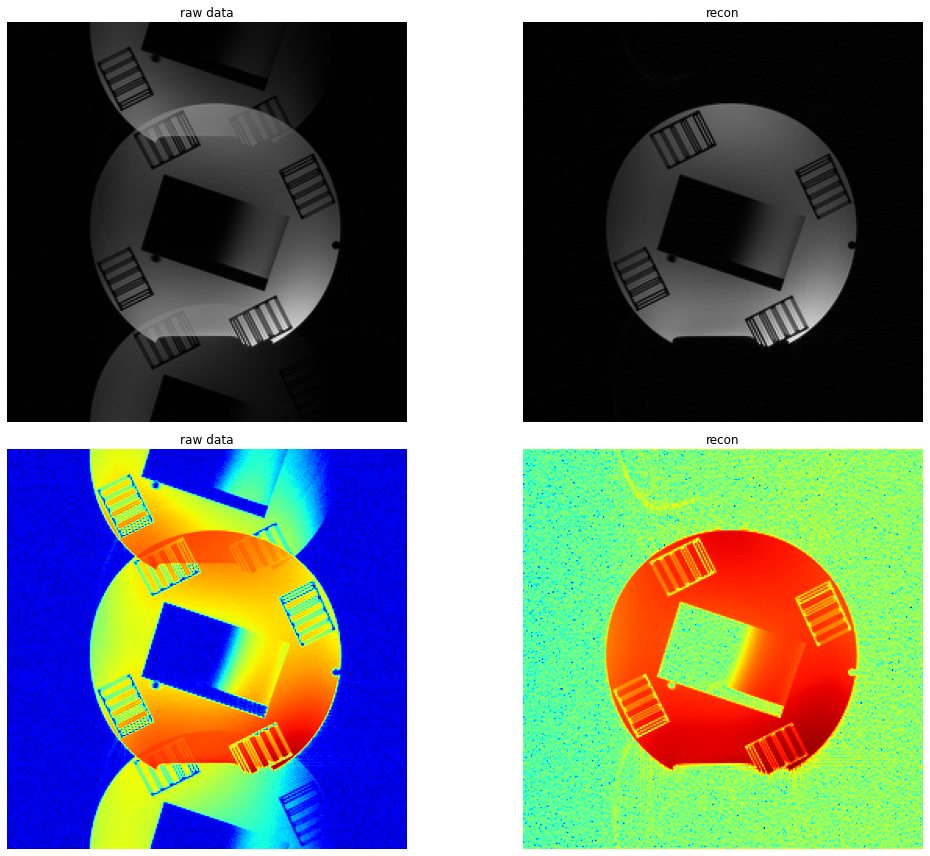

In [10]:
plt.figure(figsize =(16,12))
plt.subplot(2,2,1) 
plt.axis('off')
plt.title("raw data")
plt.imshow(np.abs((rsos(ifft2c(data)))), cmap ="gray")
plt.subplot(2,2,2)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs((((recon)))), cmap ="gray")
plt.subplot(2,2,3)
plt.axis('off')
plt.title("raw data")
plt.imshow(np.abs(np.log(rsos(ifft2c(data)))), cmap ="jet")
plt.subplot(2,2,4)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(np.log(((recon)))), cmap ="jet")
plt.tight_layout()
plt.savefig("EPI_page.png")